<a href="https://colab.research.google.com/github/ajaykumar6666/Churn-Modeling-with-ANN/blob/master/Churn_Modeling_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/datasets_13214_17927_Churn_Modelling.csv')

In [4]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [5]:
geography=pd.get_dummies(df['Geography'],drop_first=True)
gender=pd.get_dummies(df['Gender'],drop_first=True)

In [14]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [6]:
df.drop(columns=['Geography','Gender','Surname'],inplace=True)

In [7]:
df=pd.concat([df,geography,gender],axis=1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [10]:
y=df['Exited']

In [11]:
X=df.drop(columns='Exited')

In [12]:
X.shape,y.shape

((10000, 13), (10000,))

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [31]:
X_train.mean(),X_test.mean(),y_train.mean(),y_test.mean()

(RowNumber          5.018444e+03
 CustomerId         1.569121e+07
 CreditScore        6.503136e+02
 Age                3.888725e+01
 Tenure             5.025000e+00
 Balance            7.646344e+04
 NumOfProducts      1.531875e+00
 HasCrCard          7.070000e-01
 IsActiveMember     5.115000e-01
 EstimatedSalary    1.001434e+05
 Germany            2.537500e-01
 Spain              2.470000e-01
 Male               5.442500e-01
 dtype: float64, RowNumber          4.928726e+03
 CustomerId         1.568985e+07
 CreditScore        6.513895e+02
 Age                3.906000e+01
 Tenure             4.964000e+00
 Balance            7.657567e+04
 NumOfProducts      1.523500e+00
 HasCrCard          6.995000e-01
 IsActiveMember     5.295000e-01
 EstimatedSalary    9.987748e+04
 Germany            2.395000e-01
 Spain              2.505000e-01
 Male               5.515000e-01
 dtype: float64, 0.20275, 0.2075)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc=StandardScaler()

In [16]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [17]:
X_train

array([[-0.80531942,  0.42399976, -0.23082038, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [ 0.04247882, -1.02496943, -0.25150912, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.84899177,  1.18230224, -0.3963303 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [-1.42539753, -0.21286544,  0.22433188, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.06050233, -1.16325633,  0.13123255, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-1.65762353,  1.14029686,  1.1656695 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LeakyReLU,PReLU,ELU

In [19]:
classifier=Sequential()

In [20]:
X_train.shape

(8000, 13)

In [26]:
classifier.add(Dense(input_dim=13,kernel_initializer='he_uniform',units=7,activation='relu'))
classifier.add(Dense(kernel_initializer='he_uniform',units=7,activation='relu'))
classifier.add(Dense(kernel_initializer='glorot_uniform',units=1,activation='sigmoid'))

In [27]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
model_history=classifier.fit(X_train,y_train,batch_size=10,epochs=100,validation_split=0.33)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3442 - accuracy: 0.8597 - val_loss: 0.3544 - val_accuracy: 0.8519
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3442 - accuracy: 0.8612 - val_loss: 0.3539 - val_accuracy: 0.8519
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3442 - accuracy: 0.8623 - val_loss: 0.3561 - val_accuracy: 0.8516
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3437 - accuracy: 0.8615 - val_loss: 0.3567 - val_accuracy: 0.8504
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3434 - accuracy: 0.8615 - val_loss: 0.3584 - val_accuracy: 0.8519
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3443 - accuracy: 0.8612 - val_loss: 0.3554 - val_accuracy: 0.8535
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3426 - accuracy: 0.8623 - val_loss: 0.3536 - val_accuracy: 0.8527

In [30]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
normal_accuracy=model_history.history['accuracy']
val_accuracy=model_history.history['val_accuracy']

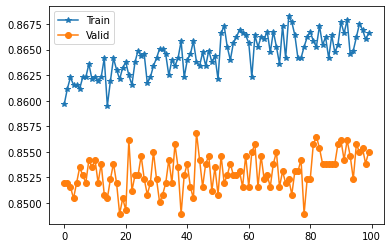

In [42]:
plt.plot(normal_accuracy,'*-',val_accuracy,'o-')
plt.legend(['Train','Valid'])

In [44]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [46]:
confusion_matrix(y_test,y_pred)

array([[1505,   80],
       [ 222,  193]])

In [47]:
accuracy_score(y_pred,y_test)

0.849